#### This notebook consists of four tasks, which will be developed gradually :
1. Permutations and Combinations
2. numpy's Normal Distribution 
3. t-Test Calculation
4. ANOVA


### 1. Permutations and Combinations

This task is based on Lady Tasting Tea experiment created by Ronald Fisher published in The Design of Experiments in 1935.<br>Background: Eight cups of tea were given to a lady who was asked to differentiate between four cups of tea that had milk in first and four cups with tea added first. 

The null hypothesis H<sub>0</sub> of the experiment: The lady couldn't tell the difference between the cups.    

Task:       
- Altering the experiment by using 12 cups of tea instead of 8 with 6 having milk in first and 6 having tea in first where the subject claims to be able to tell the difference between the cups.<br> 
The H<sub>0</sub> remains the same: the subject is not able to distinguish between the cups.      
- Accept one error in the experiment assuming the subject selected 5 correct cups and calculate the probability with H<sub>0</sub> remaining the same     
- Accept two errors and calculate the probability         

In [76]:
# Importing modules
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

In [77]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

In [78]:
# https://docs.python.org/3/library/math.html#math.comb
# Combination represents the number of ways (k) to pick the cups with milk in first without repetition and order from the total number of cups (n)
ways = math.comb(no_cups, no_cups_milk_first)

# Show - there are 924 ways to pick the six cups with the milk in first
ways

924

In [79]:
# Total number of ways of selecting six cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

In [80]:
# No of ways of shuffling the six cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

In [81]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

In [82]:
# The cup labels
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [83]:
# Showing all the ways of selecting no_cups_milk_first out of no_cups cups of tea by using 
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [84]:
# Number of combinations.
len(combs)

924

In [85]:
# Select six cups at random to put milk in first
# https://docs.python.org/3/library/random.html#random.sample
# Different, randomized output each time 
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 1, 3, 4, 7, 11]

In [86]:
# Turn labels_milk into a set - gives unique values 
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 1, 3, 4, 7, 11}

In [87]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 6) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 7) {0, 1, 3, 4, 7} 5
(0, 1, 2, 3, 4, 8) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 9) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 10) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 11) {0, 1, 3, 4, 11} 5
(0, 1, 2, 3, 5, 6) {0, 1, 3} 3
(0, 1, 2, 3, 5, 7) {0, 1, 3, 7} 4
(0, 1, 2, 3, 5, 8) {0, 1, 3} 3
(0, 1, 2, 3, 5, 9) {0, 1, 3} 3
(0, 1, 2, 3, 5, 10) {0, 1, 3} 3
(0, 1, 2, 3, 5, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 6, 7) {0, 1, 3, 7} 4
(0, 1, 2, 3, 6, 8) {0, 1, 3} 3
(0, 1, 2, 3, 6, 9) {0, 1, 3} 3
(0, 1, 2, 3, 6, 10) {0, 1, 3} 3
(0, 1, 2, 3, 6, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 7, 8) {0, 1, 3, 7} 4
(0, 1, 2, 3, 7, 9) {0, 1, 3, 7} 4
(0, 1, 2, 3, 7, 10) {0, 1, 3, 7} 4
(0, 1, 2, 3, 7, 11) {0, 1, 3, 7, 11} 5
(0, 1, 2, 3, 8, 9) {0, 1, 3} 3
(0, 1, 2, 3, 8, 10) {0, 1, 3} 3
(0, 1, 2, 3, 8, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 9, 10) {0, 1, 3} 3
(0, 1, 2, 3, 9, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 10, 11) {0, 1, 3, 11} 4
(0, 1, 2, 4, 5, 6) {0, 1, 4} 3
(0, 1, 2, 4, 5, 7

In [88]:
# Show the overlaps.
print(no_overlaps)

[4, 4, 5, 4, 4, 4, 5, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 4, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 6, 4, 4, 5, 4, 5, 5, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 5, 4, 5, 5, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 5, 4, 5, 5, 3, 4, 4, 4, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 2, 2, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 3, 

In [89]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

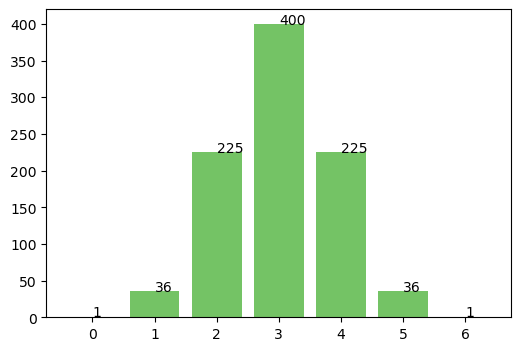

In [90]:
def addlabels(x,y):
    for i in range(len(x)):
        ax.text(i,y[i],y[i])

# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1], color='#74C365');
addlabels(counts[0], counts[1])

In [91]:
# The probability that she (randomly) selects at most five correct cups and 1 wrong
37/924

0.04004329004329004

In [92]:
# The probability that she (randomly) selects at most four correct cups (at most 2 wrong).
(225+36+1)/924

0.28354978354978355

The probability of the lady picking at most five correct and one wrong cup is very small, 4% and there is a high chance she will make another mistake if she chooses the cups again. The probability of the lady picking at most two wrong and four correct cups is higher, 28% which is why we would accept two errors. 

#### Sources: 
<https://github.com/ianmcloughlin/2425_applied_statistics>


### 2. numpy's Normal Distribution 


The purpose of this task is to check if numpy.random.normal() is generating normal values for 100 000 values where μ=10.0 and σ=3.0. To check if the sample came from the normal distribution scipy.stats.shapiro() test was used, while the histogram and the normal distribution probability density function were plotted for data visualisation. 

In [93]:
# Libraries necessary for generating and testing normal distribution
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Needed for Shapiro-Wilk test and probability density function
import scipy.stats as stats
from scipy.stats import norm

# Statistics modules
import statsmodels.api as sm

Documentation on generating a random sample from a normal distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

In [94]:
# Generating a sample of 100 000 values with μ=10.0 and σ=3.0 
sample = np.random.normal(loc=10.0, scale=3.0, size=100000)

# Show sample
sample

array([ 7.37855075,  8.93026554,  8.41347264, ..., 10.48882044,
        9.83087172,  4.11084914])

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist
https://matplotlib.org/stable/api/figure_api.html  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


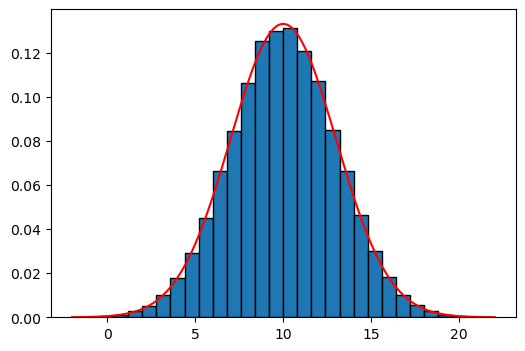

In [95]:
# Histogram of our sample data
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(sample, edgecolor='black', density="True", bins=np.linspace(-2, 22, 31))

# Probability density function plotted over histogram
x = np.linspace(-2, 22, 300)
pdf = norm.pdf(x, loc=10.0, scale=3.0)
ax.plot(x, pdf, 'r-')

#### Q-Q probability plot


Q-Q plot was used to compare distributions using their quantiles to see if they share a similar shape. In our example, we tested data against the normal distribution, and according to the result visible from the plot, our sample data is following a normal distribution. 


https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot   



((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155]),
  array([-2.35346901, -2.06481515, -1.72673018, ..., 21.84510521,
         22.64726286, 22.905354  ])),
 (2.997106522135186, 10.013160697282126, 0.9999913872829216))

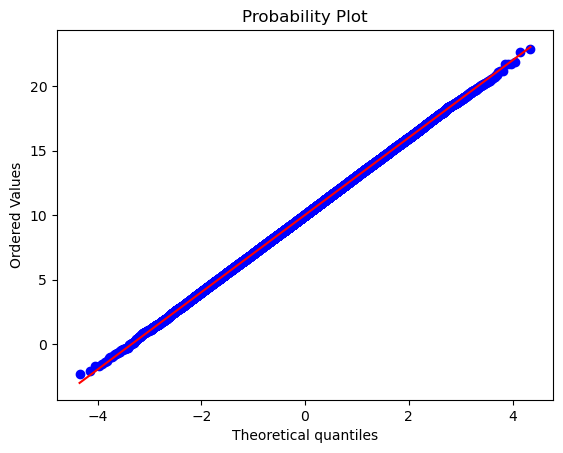

In [96]:
fig, ax = plt.subplots()

# Q-Q plot
stats.probplot(sample, dist='norm', plot=ax)

https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/   
https://stats.stackexchange.com/questions/585566/what-are-the-main-difference-between-a-qq-plot-and-a-probability-plot-for-measur    

Using a regression line to visualise the shape of data compared to a normal distribution 

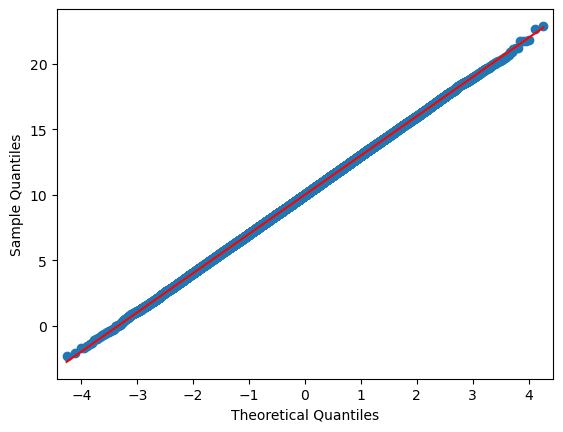

In [97]:
sm.qqplot(sample, line='r')
plt.show()

#### Testing the normality using Shapiro-Wilk test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  
https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6  
https://builtin.com/data-science/shapiro-wilk-test  



To assess if data came from a normal distribution, we use Shapiro-Wilk test.    
H<sub>0</sub>: data was drawn from a normal distribution.   
If the pvalue<0.05, we reject H<sub>0</sub>, otherwise we do not reject it, and assume the sample was pulled from the normal distribution. 

In [98]:
stats.shapiro(sample)

ShapiroResult(statistic=0.9999800815878952, pvalue=0.9180786886075384)

Since the pvalue is above 0.05, we do not reject H<sub>0</sub>, and we can assume data has been drawn from a normal distribution.

### 3. t-Test Calculation

https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter   

The purpose of this task is to compare two groups of resting heart rate for patients before and after participating in two-weeks exercise program by calculating t-statistics and comparing it to the value given by scipy.stats.  

| Patient ID | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |    
| Before | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |  
| After | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 | 
    

### 4. ANOVA

Using the variable no_type_ii=0, we estimated the probability to commit a type II error in specific circumstances. 
The test is run 10 000 times using a loop. Three samples with 100 values each are generated using numpy.random.normal with standard deviation of 0.1 and the means: 4.9, 5.0, and 5.1.   
One-way ANOVA is performed on the three samples and 1 is added to no_type_ii when a type II error occurs.   
